# 간단한 머신러닝 시작
* 생선 이진 분류 문제를 k-near(k-최근접 이웃 알고리즘)을 사용하여 풀어보고 알고리즘을 이해한다.
* scikit learn 이용하기 위해 x_data(2차원), y_data(1차원) 생성
* scatter plot (matplotlib)

In [1]:
# 도미 데이터와 방어데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 1. scatter

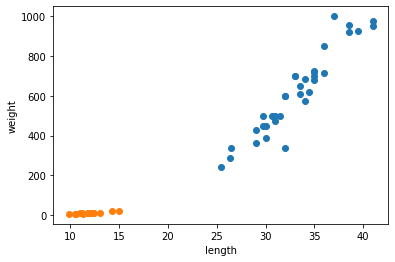

In [6]:
# scatter plot
import matplotlib.pyplot as plt

# Tip. 2개의 다른데이터셋의 산점도를 그리는건 연속으로 scatter를 쓰면 된다.
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

**Tip. 2개의 다른 데이터셋을 색깔이 다른 산점도 그리기**

연속으로 scatter를 쓰면 된다.

## 2. ML - k-Nearest Neighbors
* 학습시 2차원 리스트를 만들어야 함
* fit, score(acc.), pred

In [8]:
# scikit-learn을 위해 x_data 2차원 데이터셋 생성
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[a, b] for a, b in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [9]:
# y_data 생성 - 도미 35마리, 빙어 14마리, 총 49마리
target = [1]*35 + [0]*14
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
import numpy as np
# x_data : 2차원, y_data: 1차원
np.array(fish_data).shape, np.array(target).shape

((49, 2), (49,))

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(fish_data, target)  # x_data, y_data

KNeighborsClassifier()

In [11]:
# accuracy 확인
model.score(fish_data, target)

1.0

In [13]:
# 새로운 데이터 predict
# 주의) 데이터 1개라도 shape은 같아야 함. 2차원 데이터셋으로 들어가야함
model.predict([[30, 600]])

array([1])

### K-nearest Neighbor 알고리즘 이해
* 이건 사실 알고리즘이라고 부르기도 민망함.
* 내부에 x_data, y_data를 저장해두고 새로운데이터가 오면 직선거리를 각 점들과 계산한 뒤, 가장가까운 애들 몇개의 레이블을 확인하여 다수결로 배정한다고 생각하면 된다.
* 따라서, 데이터가 아주 많은 경우 직선거리 계산에 메모리가 많이 필요하고 시간 오래걸림.
* hyperparams - n_neighbor 다수결로 참고할 가까운 이웃수(default 5)

In [19]:
# fit으로 학습시 모델을 만든다기보단 메모리에 아래 처럼 데이터를 저장한다. 그게 본질.
model._fit_X, model._y

(array([[  25.4,  242. ],
        [  26.3,  290. ],
        [  26.5,  340. ],
        [  29. ,  363. ],
        [  29. ,  430. ],
        [  29.7,  450. ],
        [  29.7,  500. ],
        [  30. ,  390. ],
        [  30. ,  450. ],
        [  30.7,  500. ],
        [  31. ,  475. ],
        [  31. ,  500. ],
        [  31.5,  500. ],
        [  32. ,  340. ],
        [  32. ,  600. ],
        [  32. ,  600. ],
        [  33. ,  700. ],
        [  33. ,  700. ],
        [  33.5,  610. ],
        [  33.5,  650. ],
        [  34. ,  575. ],
        [  34. ,  685. ],
        [  34.5,  620. ],
        [  35. ,  680. ],
        [  35. ,  700. ],
        [  35. ,  725. ],
        [  35. ,  720. ],
        [  36. ,  714. ],
        [  36. ,  850. ],
        [  37. , 1000. ],
        [  38.5,  920. ],
        [  38.5,  955. ],
        [  39.5,  925. ],
        [  41. ,  975. ],
        [  41. ,  950. ],
        [   9.8,    6.7],
        [  10.5,    7.5],
        [  10.6,    7. ],
        [  1

In [21]:
# n_neighbor를 전체 데이터 수로 설정해보자.
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, target)
kn49.score(fish_data, target)

0.7142857142857143

n_neighbor를 전체 데이터 수로 설정하면,
* 도미, 빙어가 35, 14마리이므로 무조건 도미가 많기 때문에 도미로 예측해준다. 따라서 정확도는 도미 수만큼만 될것이다.

In [23]:
# 도미 수 / 전체
35/49

0.7142857142857143

## 코딩 문제
n_neighbors의 기본값이 5부터 49까지 바꾸어 가면서 정확도가 1.0 아래로 떨어지는 이웃의 갯수를 찾아보자.

**Tip**
* k-최근접 이웃알고리즘은 학습하는데 모델을 만드는게 아니라 데이터를 저장하는게 전부기 때문에 객체를 매번 새로 설정할 필요가 없다. 단지 속성만 바꾸면 된다.

In [25]:
model = KNeighborsClassifier()
model.fit(fish_data, target)

for n in range(5, 50):
    # 이웃 개수 설정
    model.n_neighbors = n
    score = model.score(fish_data, target)
    if score < 1:
        print(f'neighbor :{n}, acc.: {score}')
        break

neighbor :18, acc.: 0.9795918367346939
